In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_degeneracy


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_111'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

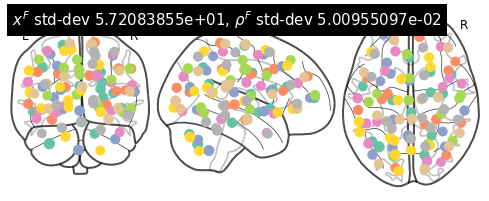

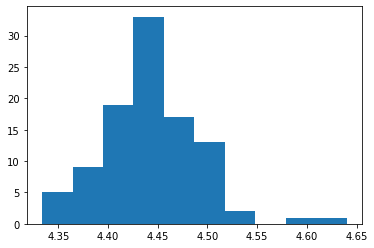

(<nilearn.plotting.displays.OrthoProjector at 0x7f66855571f0>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

48

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Heights_b_1.mp4',
 'Social_a_2.m4v',
 'Spiders_b_1.m4v',
 'Heights_a_3.mp4',
 'Social_b_1.mp4',
 'Spiders_b_3.mov',
 'Heights_a_1.mp4',
 'Social_b_4.mov',
 'Heights_b_3.mov',
 'Spiders_b_4.m4v',
 'Spiders_b_2.mp4',
 'Social_a_3.mp4',
 'Social_b_2.mov',
 'Social_b_3.mp4',
 'Spiders_a_4.mov',
 'Heights_b_4.mp4',
 'Spiders_a_2.mp4',
 'Heights_a_2.m4v',
 'Spiders_a_3.m4v',
 'Heights_b_2.m4v',
 'Social_a_4.mp4',
 'Social_a_1.mp4',
 'Heights_a_4.mp4',
 'Spiders_a_1.m4v']

In [12]:
dtfa.subjects()

[107, 119]

In [13]:
losses = dtfa.train(num_steps=250, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=1, l_s=1, l_i=1)

03/23/2022 10:07:20 [Epoch 1] (14294ms) ELBO -1.20006036e+10 = log-likelihood -1.19999163e+10 - KL from prior 6.82938674e+05, P weight penalty 8.99017559e+02, S weight penalty 8.19555939e+02, I weight penalty 1.94208133e+03
03/23/2022 10:07:22 [Epoch 2] (1943ms) ELBO -1.18134062e+10 = log-likelihood -1.18127247e+10 - KL from prior 6.77379883e+05, P weight penalty 1.00181767e+03, S weight penalty 7.67099703e+02, I weight penalty 1.93415099e+03
03/23/2022 10:07:24 [Epoch 3] (1969ms) ELBO -1.16787171e+10 = log-likelihood -1.16780406e+10 - KL from prior 6.72285086e+05, P weight penalty 8.52333134e+02, S weight penalty 7.26084019e+02, I weight penalty 1.93476770e+03
03/23/2022 10:07:25 [Epoch 4] (1947ms) ELBO -1.15506048e+10 = log-likelihood -1.15499320e+10 - KL from prior 6.68678207e+05, P weight penalty 8.07822149e+02, S weight penalty 8.19488419e+02, I weight penalty 1.93025510e+03
03/23/2022 10:07:27 [Epoch 5] (1955ms) ELBO -1.14568257e+10 = log-likelihood -1.14561578e+10 - KL from prio

03/23/2022 10:08:32 [Epoch 38] (1973ms) ELBO -1.04603613e+10 = log-likelihood -1.04598296e+10 - KL from prior 5.29084766e+05, P weight penalty 5.02578797e+02, S weight penalty 4.09507931e+02, I weight penalty 1.75970107e+03
03/23/2022 10:08:34 [Epoch 39] (1941ms) ELBO -1.04144529e+10 = log-likelihood -1.04139247e+10 - KL from prior 5.25622168e+05, P weight penalty 4.88405983e+02, S weight penalty 3.78654642e+02, I weight penalty 1.75535603e+03
03/23/2022 10:08:36 [Epoch 40] (1952ms) ELBO -1.03822529e+10 = log-likelihood -1.03817328e+10 - KL from prior 5.17733256e+05, P weight penalty 4.91198233e+02, S weight penalty 3.52392400e+02, I weight penalty 1.74947552e+03
03/23/2022 10:08:38 [Epoch 41] (2020ms) ELBO -1.03497446e+10 = log-likelihood -1.03492300e+10 - KL from prior 5.12042521e+05, P weight penalty 5.15786053e+02, S weight penalty 4.07821813e+02, I weight penalty 1.74582258e+03
03/23/2022 10:08:40 [Epoch 42] (1952ms) ELBO -1.03118872e+10 = log-likelihood -1.03113783e+10 - KL from 

03/23/2022 10:09:46 [Epoch 75] (1945ms) ELBO -9.55361483e+09 = log-likelihood -9.55328784e+09 - KL from prior 3.23989844e+05, P weight penalty 8.90988846e+02, S weight penalty 4.45932978e+02, I weight penalty 1.60999597e+03
03/23/2022 10:09:48 [Epoch 76] (1947ms) ELBO -9.53795920e+09 = log-likelihood -9.53763520e+09 - KL from prior 3.20977981e+05, P weight penalty 8.64132427e+02, S weight penalty 4.24288565e+02, I weight penalty 1.60544490e+03
03/23/2022 10:09:50 [Epoch 77] (1946ms) ELBO -9.52802549e+09 = log-likelihood -9.52770554e+09 - KL from prior 3.16804210e+05, P weight penalty 8.84690964e+02, S weight penalty 4.25033727e+02, I weight penalty 1.60284173e+03
03/23/2022 10:09:52 [Epoch 78] (2003ms) ELBO -9.51864850e+09 = log-likelihood -9.51833248e+09 - KL from prior 3.13006067e+05, P weight penalty 8.72472614e+02, S weight penalty 4.06362970e+02, I weight penalty 1.59882520e+03
03/23/2022 10:09:54 [Epoch 79] (2007ms) ELBO -9.50779733e+09 = log-likelihood -9.50748410e+09 - KL from 

03/23/2022 10:10:59 [Epoch 112] (1967ms) ELBO -9.29190722e+09 = log-likelihood -9.29164328e+09 - KL from prior 2.60697821e+05, P weight penalty 9.99409050e+02, S weight penalty 4.91487865e+02, I weight penalty 1.50707066e+03
03/23/2022 10:11:01 [Epoch 113] (1975ms) ELBO -9.28463901e+09 = log-likelihood -9.28437451e+09 - KL from prior 2.61061032e+05, P weight penalty 1.04121526e+03, S weight penalty 4.94415907e+02, I weight penalty 1.50369019e+03
03/23/2022 10:11:03 [Epoch 114] (1963ms) ELBO -9.27928330e+09 = log-likelihood -9.27901882e+09 - KL from prior 2.61078817e+05, P weight penalty 1.05770841e+03, S weight penalty 4.91813691e+02, I weight penalty 1.50162646e+03
03/23/2022 10:11:05 [Epoch 115] (2029ms) ELBO -9.27957779e+09 = log-likelihood -9.27931450e+09 - KL from prior 2.60013446e+05, P weight penalty 1.01573921e+03, S weight penalty 5.13044205e+02, I weight penalty 1.49911865e+03
03/23/2022 10:11:07 [Epoch 116] (2039ms) ELBO -9.27416406e+09 = log-likelihood -9.27390038e+09 - KL 

03/23/2022 10:12:12 [Epoch 149] (2034ms) ELBO -9.17256158e+09 = log-likelihood -9.17229379e+09 - KL from prior 2.64951137e+05, P weight penalty 1.01471042e+03, S weight penalty 5.57689043e+02, I weight penalty 1.41363005e+03
03/23/2022 10:12:14 [Epoch 150] (2030ms) ELBO -9.16965603e+09 = log-likelihood -9.16938797e+09 - KL from prior 2.65186550e+05, P weight penalty 1.03841780e+03, S weight penalty 5.31799145e+02, I weight penalty 1.41012459e+03
03/23/2022 10:12:16 [Epoch 151] (2047ms) ELBO -9.16745648e+09 = log-likelihood -9.16718765e+09 - KL from prior 2.65900814e+05, P weight penalty 1.04838356e+03, S weight penalty 5.40902695e+02, I weight penalty 1.40883069e+03
03/23/2022 10:12:18 [Epoch 152] (2047ms) ELBO -9.16573552e+09 = log-likelihood -9.16546678e+09 - KL from prior 2.65818545e+05, P weight penalty 1.02979428e+03, S weight penalty 5.49352312e+02, I weight penalty 1.40629866e+03
03/23/2022 10:12:20 [Epoch 153] (2047ms) ELBO -9.16320510e+09 = log-likelihood -9.16293578e+09 - KL 

03/23/2022 10:13:26 [Epoch 186] (1949ms) ELBO -9.10115542e+09 = log-likelihood -9.10087434e+09 - KL from prior 2.78168795e+05, P weight penalty 1.00401024e+03, S weight penalty 5.51595720e+02, I weight penalty 1.32550056e+03
03/23/2022 10:13:28 [Epoch 187] (1948ms) ELBO -9.09951602e+09 = log-likelihood -9.09923483e+09 - KL from prior 2.78384551e+05, P weight penalty 9.87525513e+02, S weight penalty 5.79821763e+02, I weight penalty 1.32427187e+03
03/23/2022 10:13:30 [Epoch 188] (1951ms) ELBO -9.09840882e+09 = log-likelihood -9.09812714e+09 - KL from prior 2.78792996e+05, P weight penalty 1.01695922e+03, S weight penalty 5.65361988e+02, I weight penalty 1.32072173e+03
03/23/2022 10:13:32 [Epoch 189] (1957ms) ELBO -9.09580520e+09 = log-likelihood -9.09552288e+09 - KL from prior 2.79500699e+05, P weight penalty 9.90844360e+02, S weight penalty 5.61646627e+02, I weight penalty 1.31791832e+03
03/23/2022 10:13:34 [Epoch 190] (1993ms) ELBO -9.09479200e+09 = log-likelihood -9.09450931e+09 - KL 

03/23/2022 10:14:39 [Epoch 223] (1961ms) ELBO -9.05102045e+09 = log-likelihood -9.05072589e+09 - KL from prior 2.91656508e+05, P weight penalty 9.44139877e+02, S weight penalty 5.72214248e+02, I weight penalty 1.23188891e+03
03/23/2022 10:14:41 [Epoch 224] (1960ms) ELBO -9.05020843e+09 = log-likelihood -9.04991370e+09 - KL from prior 2.91820062e+05, P weight penalty 9.58249451e+02, S weight penalty 5.95539749e+02, I weight penalty 1.23073921e+03
03/23/2022 10:14:43 [Epoch 225] (1959ms) ELBO -9.04918211e+09 = log-likelihood -9.04888733e+09 - KL from prior 2.92099764e+05, P weight penalty 9.27266556e+02, S weight penalty 5.75727695e+02, I weight penalty 1.22764115e+03
03/23/2022 10:14:45 [Epoch 226] (1960ms) ELBO -9.04797334e+09 = log-likelihood -9.04767786e+09 - KL from prior 2.92705377e+05, P weight penalty 9.43656479e+02, S weight penalty 5.66361525e+02, I weight penalty 1.22557098e+03
03/23/2022 10:14:47 [Epoch 227] (1961ms) ELBO -9.04625502e+09 = log-likelihood -9.04595925e+09 - KL 

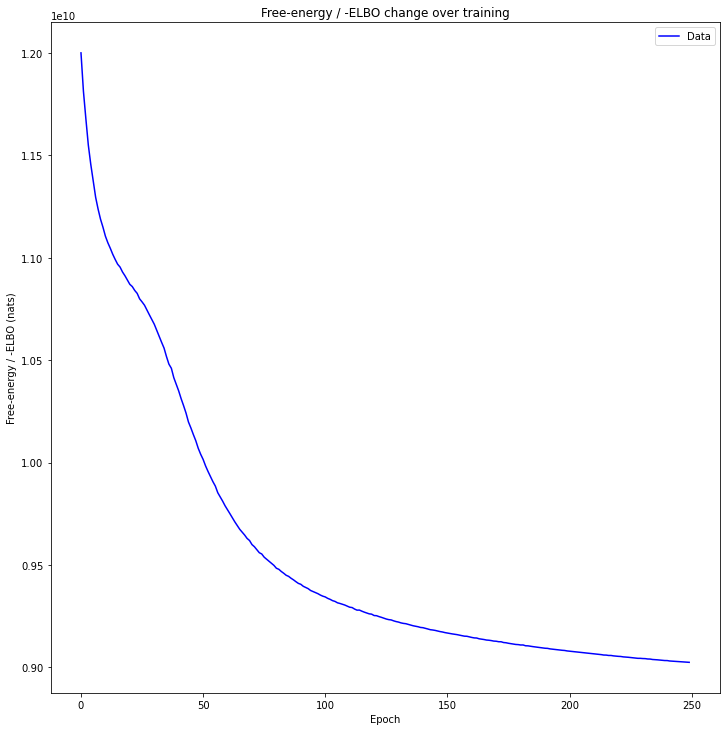

In [14]:
utils.plot_losses(losses)

In [15]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100)

[[618000000.0, -617996032.0, 3951.958984375],
 [629516800.0, -605222912.0, 4080.164306640625]]

In [16]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, ablate_subjects=True)

[[617409792.0, -617405440.0, 4317.201171875],
 [630081600.0, -606072832.0, 4450.5458984375]]

In [17]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, ablate_tasks=True)

[[617529408.0, -617525504.0, 3915.206298828125],
 [631420992.0, -604882432.0, 3999.536865234375]]

In [18]:
dtfa.free_energy(batch_size=64, use_cuda=True, blocks_filter=affvids_db.inference_filter(training=False),
                 sample_size=100, custom_interaction=[0, 0.5])

[[617101504.0, -617097536.0, 4006.448486328125],
 [633548608.0, -603243136.0, 4102.41162109375]]

In [19]:
len(dtfa.subjects())

2

In [20]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


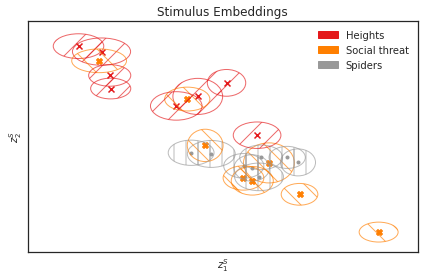

In [21]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [22]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


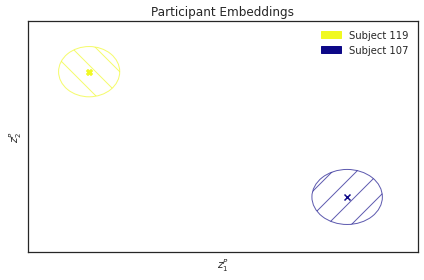

In [23]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

/home/zulqarnain/Code/ntfa_degeneracy/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


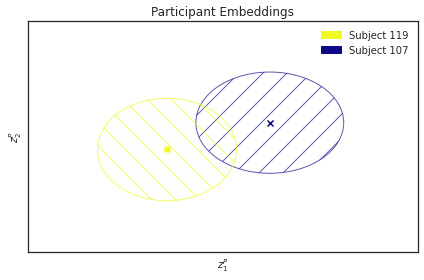

In [24]:
dtfa.scatter_subject_weight_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [25]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

03/23/2022 10:17:17 Plotting factors for Participant 119, run 1


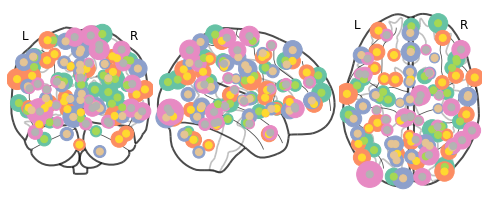

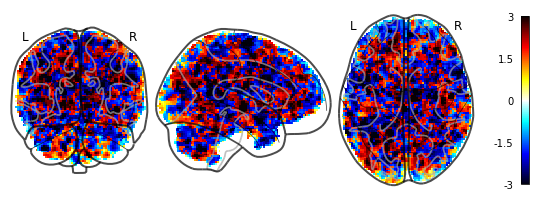

03/23/2022 10:17:36 Reconstruction Error (Frobenius Norm): 3.97206146e+02 out of 4.15453552e+02


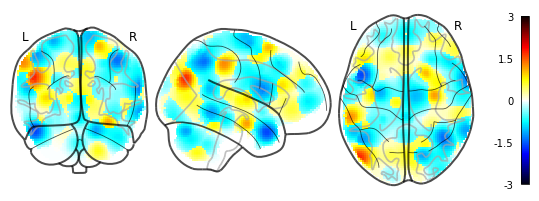

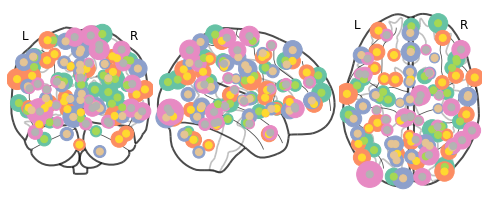

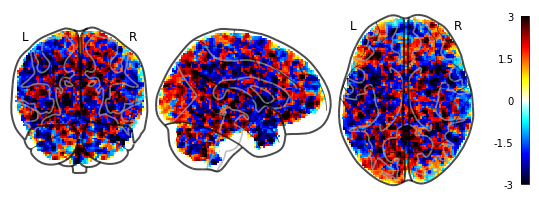

03/23/2022 10:17:58 Reconstruction Error (Frobenius Norm): 3.84946625e+02 out of 4.05968506e+02


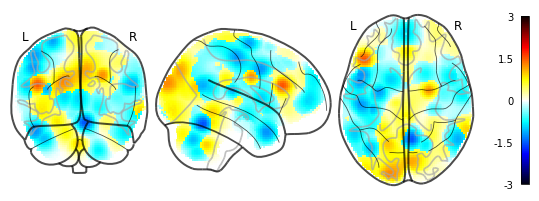

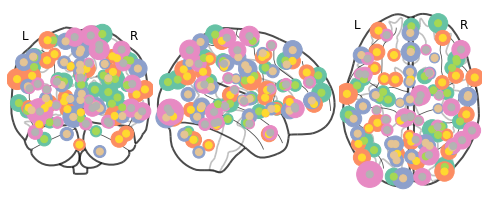

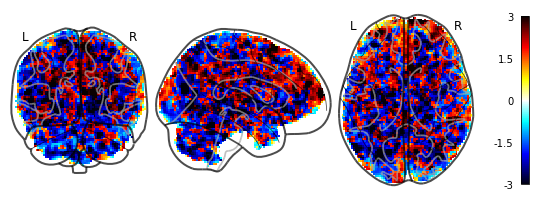

03/23/2022 10:18:19 Reconstruction Error (Frobenius Norm): 3.95782776e+02 out of 4.21500397e+02


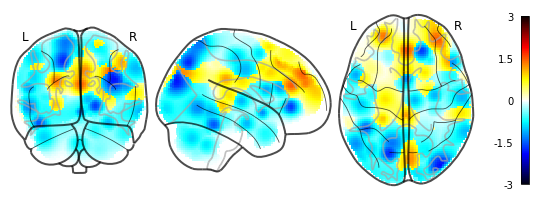

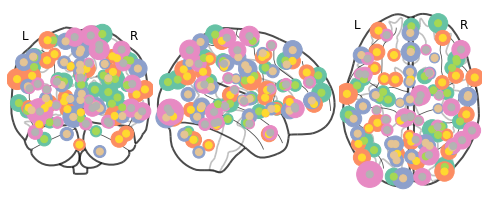

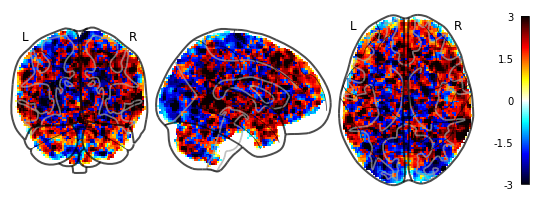

03/23/2022 10:18:41 Reconstruction Error (Frobenius Norm): 3.88682312e+02 out of 4.26527374e+02


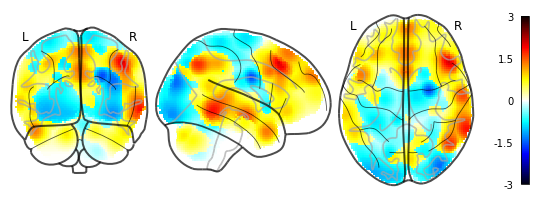

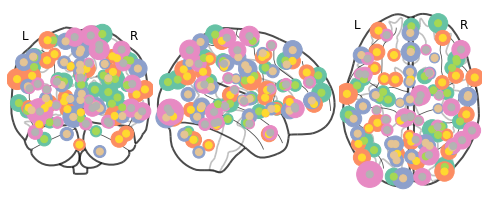

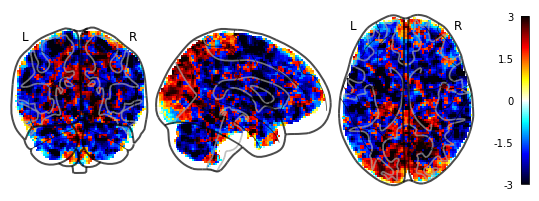

03/23/2022 10:19:04 Reconstruction Error (Frobenius Norm): 3.92993134e+02 out of 4.46226288e+02


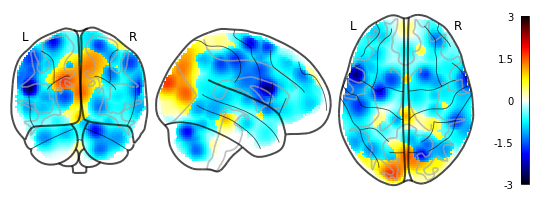

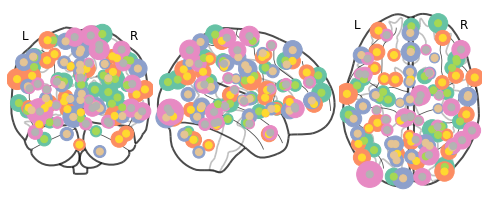

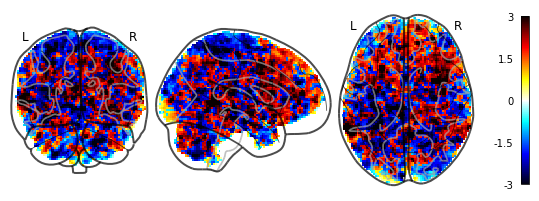

03/23/2022 10:19:28 Reconstruction Error (Frobenius Norm): 3.90131470e+02 out of 4.18177704e+02


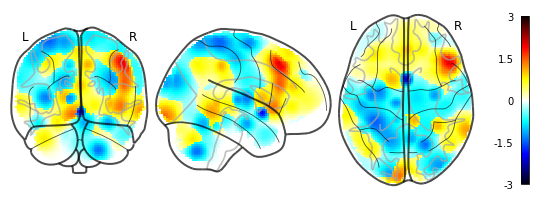

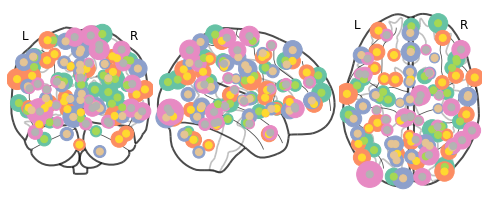

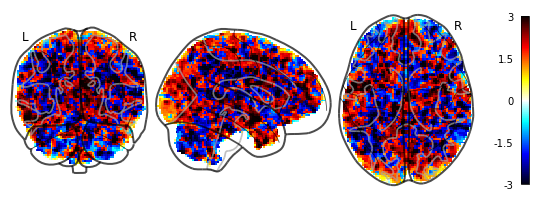

03/23/2022 10:19:53 Reconstruction Error (Frobenius Norm): 3.94087830e+02 out of 4.19391571e+02


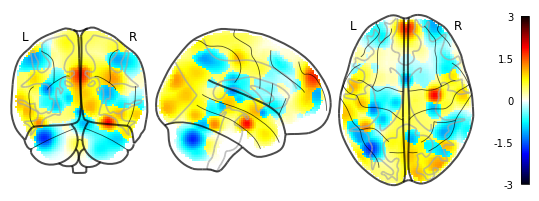

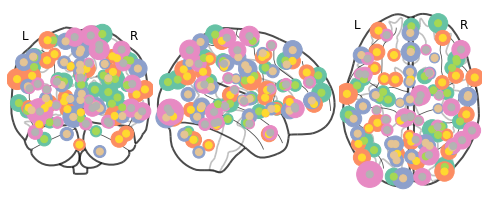

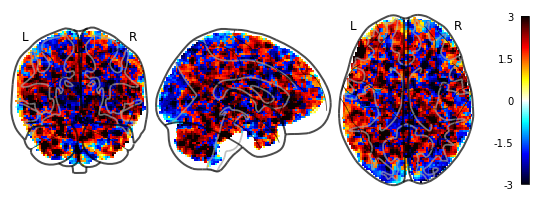

03/23/2022 10:20:18 Reconstruction Error (Frobenius Norm): 4.01107910e+02 out of 4.25749207e+02


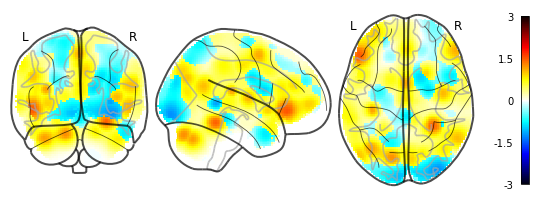

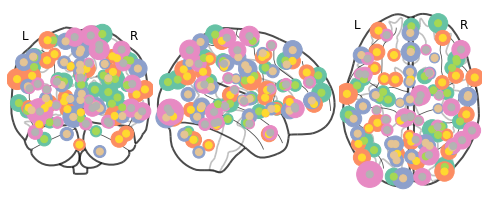

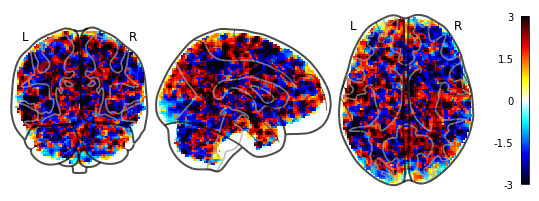

03/23/2022 10:20:45 Reconstruction Error (Frobenius Norm): 4.00647583e+02 out of 4.27734009e+02


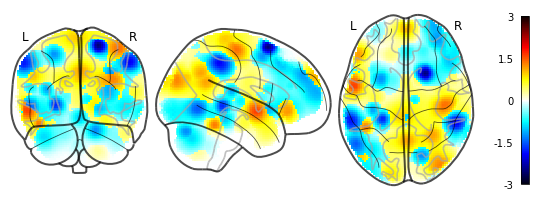

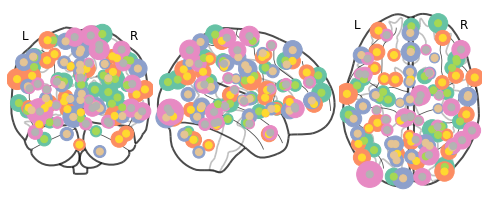

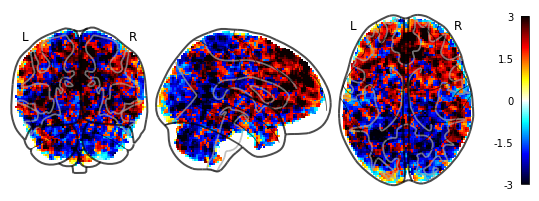

03/23/2022 10:21:12 Reconstruction Error (Frobenius Norm): 3.95822662e+02 out of 4.41746979e+02


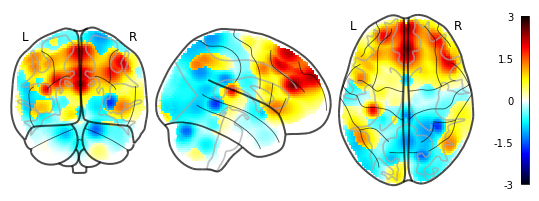

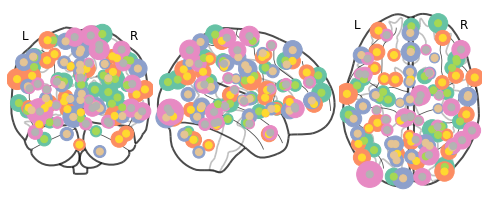

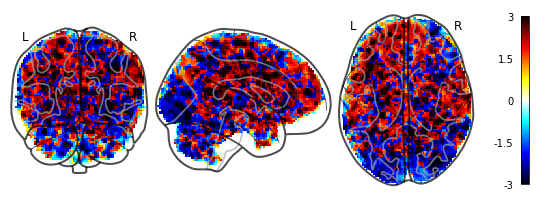

03/23/2022 10:21:40 Reconstruction Error (Frobenius Norm): 4.83636505e+02 out of 4.35969086e+02


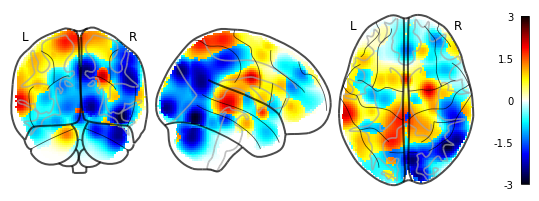

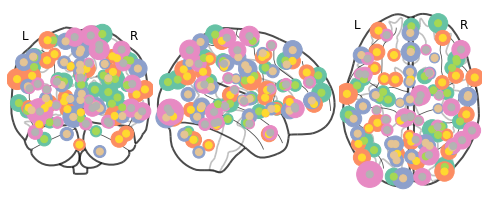

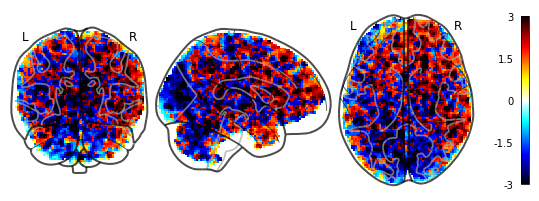

03/23/2022 10:22:09 Reconstruction Error (Frobenius Norm): 3.92328491e+02 out of 4.21244843e+02


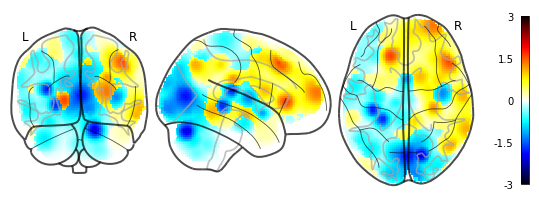

In [26]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

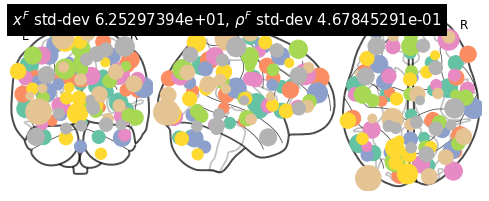

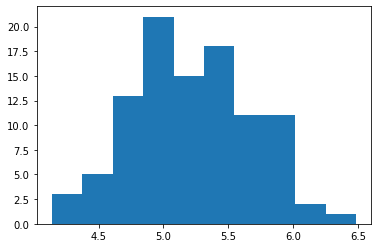

(<nilearn.plotting.displays.OrthoProjector at 0x7f6640d45580>,
 tensor([[ 1.4670e+01, -5.5781e+01,  1.9223e+01],
         [ 2.2625e+01,  2.3104e+01,  2.0300e+01],
         [-5.7240e+01, -8.8531e-01, -3.3111e+00],
         [-3.8710e+01, -7.1978e+01, -3.3134e+01],
         [-2.3412e+01, -9.9343e+00,  7.2701e+01],
         [-5.3772e+01, -6.1933e+01,  4.2531e+01],
         [ 4.8169e+01,  2.2631e+01, -4.7547e+00],
         [ 1.9417e+01, -8.5048e+01, -3.3033e+01],
         [ 4.0277e+01, -3.7644e+00,  3.3740e+00],
         [ 1.8870e-01,  3.3661e+01,  2.2430e+01],
         [ 2.4146e+01, -5.7697e+00,  3.1575e+01],
         [ 2.8695e+01,  6.1105e+01,  1.4703e+01],
         [ 1.1581e+00, -3.1774e+01, -1.7851e+01],
         [-1.1097e+01, -9.5810e+01,  2.9114e+01],
         [-2.1547e+01, -8.1300e+00,  3.0173e+01],
         [ 2.4196e+01, -3.7107e+01,  6.6995e+01],
         [ 2.0927e+01, -3.8134e+01, -2.0033e+00],
         [-6.0245e+01, -3.5409e+01,  1.2100e+01],
         [-2.9634e+01, -1.7548e+01, -

In [27]:
dtfa.visualize_factor_embedding()

In [28]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [29]:
z_ps_mu

array([[-0.28776994,  0.43027765],
       [-0.31303668,  0.46142125],
       [-0.33872634,  0.47622943],
       [-0.30298868,  0.42800504],
       [-0.30033517,  0.43782884],
       [-0.29848993,  0.43593666],
       [-0.35288081,  0.46378213],
       [-0.3911154 ,  0.39442775],
       [-0.31146783,  0.43171176],
       [-0.31250954,  0.45968127],
       [-0.33457136,  0.47450593],
       [-0.35478857,  0.48815376],
       [-0.32243848,  0.4404082 ],
       [-0.35087472,  0.48675713],
       [-0.29357511,  0.44394958],
       [-0.31884477,  0.44973046],
       [-0.33986872,  0.47972554],
       [-0.33660817,  0.45147651],
       [-0.35126108,  0.47996169],
       [-0.24512222,  0.40344608],
       [-0.35293475,  0.45229501],
       [-0.34541211,  0.47454146],
       [-0.28711057,  0.44004011],
       [-0.36721176,  0.48836896],
       [-0.30900776,  0.4652454 ],
       [-0.33427447,  0.49638903],
       [-0.35996413,  0.51119721],
       [-0.32264617,  0.46229279],
       [-0.32157296,

In [30]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

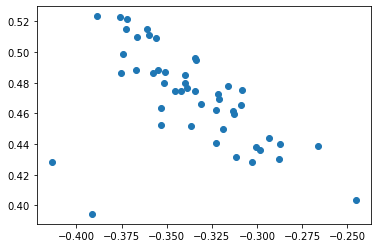

In [31]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])